In [ ]:
# Instalar librerías en las versiones utilizadas en este trabajo
!pip install -r requirements.txt

In [8]:
# Importamos librerías
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [9]:
# Importar archivos
ruta_base = os.path.join(os.pardir, "Bases")
df_argenprop = pd.read_excel(ruta_base + "/Bases scrapeo/scraping_2amb_2024-12-05.xlsx")

In [10]:
#Separamos la moneda (USD o $) del valor del precio en dos columnas
df_temp = df_argenprop['Precio'].str.split(' ', expand = True)
df_argenprop['Moneda'] = df_temp[0]
df_argenprop['Precio'] = df_temp[1]

In [11]:
df_argenprop

,Precio,Barrio,Fecha,Moneda
0,550.000,Palermo,2024-12-05,$
1,550.000,Palermo,2024-12-05,$
2,520.000,Palermo,2024-12-05,$
3,400.000,Botanico,2024-12-05,$
4,590.000,Barrio Norte,2024-12-05,$
...,...,...,...,...
1975,1.800,Puerto Madero,2024-12-05,USD
1976,1.700,Recoleta,2024-12-05,USD
1977,450,Floresta,2024-12-05,USD
1978,2.000,Puerto Madero,2024-12-05,USD


In [12]:
# Sacamos los puntos para que el precio sea solo número
df_argenprop['Precio'] = df_argenprop['Precio'].str.replace(".", "")
# Convertimos la columna precio a valores numéricos
df_argenprop["Precio"] = pd.to_numeric(df_argenprop["Precio"], errors="coerce")
# eliminamos los casos vacíos
df_argenprop = df_argenprop.dropna()
# Convertimos la columna precio a int
df_argenprop["Precio"] = df_argenprop["Precio"].astype(int)

#Reseteamos el index
df_argenprop = df_argenprop.reset_index(drop=True)

C:\Users\emita\AppData\Local\Temp\ipykernel_12156\2625085310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argenprop["Precio"] = df_argenprop["Precio"].astype(int)


In [13]:
df_argenprop

,Precio,Barrio,Fecha,Moneda
0,550000,Palermo,2024-12-05,$
1,550000,Palermo,2024-12-05,$
2,520000,Palermo,2024-12-05,$
3,400000,Botanico,2024-12-05,$
4,590000,Barrio Norte,2024-12-05,$
...,...,...,...,...
1968,1800,Puerto Madero,2024-12-05,USD
1969,1700,Recoleta,2024-12-05,USD
1970,450,Floresta,2024-12-05,USD
1971,2000,Puerto Madero,2024-12-05,USD


In [14]:
# Verificamos que precio haya quedado como integer
df_argenprop['Precio'].dtype

dtype('int64')

In [15]:
# Definimos comunas
COMUNA1 = ['Retiro', 'San Nicolás', 'Puerto Madero', 'San Telmo', 'Monserrat', "Montserrat", 'Constitución', "Tribunales", "Constitucion", "Barrio San Pedro", "Centro", "Microcentro"]
COMUNA2 = ['Recoleta', "Barrio Norte", "Plaza San Martín"]
COMUNA3 = ['Balvanera', 'San Cristóbal', "Abasto", "Congreso", "Once", "San Cristobal"]
COMUNA4  = ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya', "Boca", "Pompeya"]
COMUNA5  = ['Almagro' , 'Boedo', "Almagro Norte"]
COMUNA6  = ['Caballito', "Caballito Norte", "Caballito Sur", "Cid Campeador", "Parque Rivadavia", "Parque Centenario", "Primera Junta"]
COMUNA7  = ['Flores' , 'Parque Chacabuco', "Flores Norte", "Flores Sur"]
COMUNA8  = ['Villa Soldati', 'Villa Riachuelo' , 'Villa Lugano']
COMUNA9  = ['Liniers', 'Mataderos' , 'Parque Avellaneda']
COMUNA10 = ['Villa Real','Monte Castro','Versalles','Floresta','Vélez Sarfield', "Velez Sarsfield", 'Villa Luro', "Floresta Sur", "Floresta Norte"]
COMUNA11 = ['Villa General Mitre','Villa Devoto','Villa del Parque', 'Villa Santa Rita']
COMUNA12 = ['Coghlan','Saavedra','Villa Urquiza' , 'Villa Pueyrredón', "Villa Pueyrredon", "Urquiza R"]
COMUNA13 = ['Núñez', "Nuñez", 'Belgrano','Colegiales', "Belgrano Barrancas", "Belgrano C", "Belgrano R", "Belgrano Chico", "Lomas de Nuñez"]
COMUNA14 = ['Palermo', "Botanico", "Parque Las Heras", "Las Cañitas", "Palermo Chico", "Palermo Hollywood", "Palermo Nuevo", "Palermo Soho", "Palermo Viejo", ]
COMUNA15 = ['Chacarita','Villa Crespo','La Paternal','Villa Ortúzar', "Villa Ortuzar", 'Agronomía' ,'Parque Chas', "Agronomia", "Paternal"]

In [16]:
# Definimos una función para asignar comuna al barrio
comunas = [COMUNA1, COMUNA2, COMUNA3, COMUNA4, COMUNA5, COMUNA6, COMUNA7, COMUNA8, COMUNA9, COMUNA10, COMUNA11, COMUNA12, COMUNA13, COMUNA14, COMUNA15,]
def barrio2comuna(barrio):
  for c in range(0,15):
    if barrio in comunas[c]:
      return(c+1)
  return('No se encuentra')

In [17]:
#Aplicamos la función barrio2comuna solo a las filas de la columna Barrio
df_argenprop['Comuna'] = df_argenprop['Barrio'].apply(barrio2comuna)

print(df_argenprop)

      Precio         Barrio      Fecha Moneda  Comuna
0     550000        Palermo 2024-12-05      $      14
1     550000        Palermo 2024-12-05      $      14
2     520000        Palermo 2024-12-05      $      14
3     400000       Botanico 2024-12-05      $      14
4     590000   Barrio Norte 2024-12-05      $       2
...      ...            ...        ...    ...     ...
1968    1800  Puerto Madero 2024-12-05    USD       1
1969    1700       Recoleta 2024-12-05    USD       2
1970     450       Floresta 2024-12-05    USD      10
1971    2000  Puerto Madero 2024-12-05    USD       1
1972    1900  Puerto Madero 2024-12-05    USD       1

[1973 rows x 5 columns]


In [18]:
# Usamos filtro para chequear que todos los barrios se identifiquen con una comuna y, en caso contrario, asignar el barrio a la comuna

filtro = df_argenprop['Comuna'] == 'No se encuentra'
df_filtrado_sincomunas = df_argenprop[filtro]

df_filtrado_sincomunas

df_filtrado_sincomunas.to_excel(ruta_base + '/Tablas y bases análisis scraping/argenprop_comunas_missing_2amb.xlsx', index=False)

In [19]:
df_filtrado_sincomunas

,Precio,Barrio,Fecha,Moneda,Comuna


In [20]:
#Filtramos los valores en pesos para deshacernos de valores con errores / outliers
filtro = (df_argenprop["Precio"] > 200000) & (df_argenprop["Precio"] < 4200000) & (df_argenprop["Moneda"] == '$')
df_filtrado_pesos = df_argenprop[filtro]

#Reseteamos el index
df_filtrado_pesos = df_filtrado_pesos.reset_index(drop=True)

In [21]:
df_filtrado_pesos

,Precio,Barrio,Fecha,Moneda,Comuna
0,550000,Palermo,2024-12-05,$,14
1,550000,Palermo,2024-12-05,$,14
2,520000,Palermo,2024-12-05,$,14
3,400000,Botanico,2024-12-05,$,14
4,590000,Barrio Norte,2024-12-05,$,2
...,...,...,...,...,...
1664,360000,Villa Lugano,2024-12-05,$,8
1665,800000,Recoleta,2024-12-05,$,2
1666,450000,Villa Luro,2024-12-05,$,10
1667,600000,Recoleta,2024-12-05,$,2


In [22]:
#Hacemos lo mismo con los valores en dólares
filtro = (df_argenprop["Precio"] > 100) & (df_argenprop['Precio'] < 4000) & (df_argenprop["Moneda"] == 'USD')
df_filtrado_dolares = df_argenprop[filtro]

#Reseteamos el index
df_filtrado_dolares = df_filtrado_dolares.reset_index(drop=True)

In [23]:
df_filtrado_dolares

,Precio,Barrio,Fecha,Moneda,Comuna
0,750,Palermo Hollywood,2024-12-05,USD,14
1,750,Belgrano C,2024-12-05,USD,13
2,650,Belgrano R,2024-12-05,USD,13
3,400,Microcentro,2024-12-05,USD,1
4,1500,Puerto Madero,2024-12-05,USD,1
...,...,...,...,...,...
290,1800,Puerto Madero,2024-12-05,USD,1
291,1700,Recoleta,2024-12-05,USD,2
292,450,Floresta,2024-12-05,USD,10
293,2000,Puerto Madero,2024-12-05,USD,1


In [24]:
# Pasamos el df en dólares a pesos (al precio del dolar oficial del día en que se realizó el scrapeo, 5/12)

df_dolar_a_pesos = df_filtrado_dolares

df_dolar_a_pesos['Precio'] = df_dolar_a_pesos['Precio'] * 1043
df_dolar_a_pesos['Moneda'] = '$'

df_dolar_a_pesos

,Precio,Barrio,Fecha,Moneda,Comuna
0,782250,Palermo Hollywood,2024-12-05,$,14
1,782250,Belgrano C,2024-12-05,$,13
2,677950,Belgrano R,2024-12-05,$,13
3,417200,Microcentro,2024-12-05,$,1
4,1564500,Puerto Madero,2024-12-05,$,1
...,...,...,...,...,...
290,1877400,Puerto Madero,2024-12-05,$,1
291,1773100,Recoleta,2024-12-05,$,2
292,469350,Floresta,2024-12-05,$,10
293,2086000,Puerto Madero,2024-12-05,$,1


In [25]:
# Creamos un df con todos los valores en pesos para poder trabajar con todos los casos y sea comparable
df_unido = pd.concat([df_dolar_a_pesos, df_filtrado_pesos], ignore_index = True)

df_unido

,Precio,Barrio,Fecha,Moneda,Comuna
0,782250,Palermo Hollywood,2024-12-05,$,14
1,782250,Belgrano C,2024-12-05,$,13
2,677950,Belgrano R,2024-12-05,$,13
3,417200,Microcentro,2024-12-05,$,1
4,1564500,Puerto Madero,2024-12-05,$,1
...,...,...,...,...,...
1959,360000,Villa Lugano,2024-12-05,$,8
1960,800000,Recoleta,2024-12-05,$,2
1961,450000,Villa Luro,2024-12-05,$,10
1962,600000,Recoleta,2024-12-05,$,2


In [26]:
# Armamos tabla con medidas resumen del df unido
pd.set_option('display.float_format', '{:,.0f}'.format) # Le pedimos que no use notación científica
df_tablas_resumen = df_unido['Precio'].describe()

df_tablas_resumen.to_excel(ruta_base + '/Tablas y bases análisis scraping/Tabla_resumen_caba_2amb.xlsx')

In [27]:
# Armamos un groupby para sacar estadísticos por comuna
df_estadisticasxcomuna = df_unido.groupby("Comuna", as_index=False)["Precio"].describe()

print(df_estadisticasxcomuna)

df_estadisticasxcomuna.to_excel(ruta_base + '/Tablas y bases análisis scraping/Estadisticas_por_comuna_2amb.xlsx')

    Comuna  count    mean     std     min     25%     50%       75%       max
0        1    195 877,552 735,356 250,000 400,000 500,000 1,251,600 3,650,500
1        2    214 529,909 226,635 290,000 400,000 469,350   593,750 2,086,000
2        3    127 426,510 183,652 280,000 350,000 396,340   430,000 2,086,000
3        4     58 459,967 139,100 220,000 380,000 440,000   490,000 1,000,000
4        5    112 432,104  93,280 220,000 367,500 400,000   492,500   900,000
5        6    153 476,926 120,064 290,000 390,000 450,000   550,000   850,000
6        7     65 426,615  88,812 270,000 350,000 400,000   470,000   650,000
7        8      3 403,333  83,865 350,000 355,000 360,000   430,000   500,000
8        9     22 432,273  90,760 300,000 380,000 400,000   472,500   750,000
9       10     78 440,440  84,843 290,000 380,000 430,000   500,000   690,000
10      11    114 482,789 156,189 300,000 382,500 450,000   500,000 1,043,000
11      12    173 525,183 117,454 290,000 450,000 500,000   600,

In [28]:
# Armamos un groupby para sacar precio promedio por comuna
df_promedioxcomuna = df_unido.groupby("Comuna", as_index=False)["Precio"].mean()
df_promedioxcomuna['Precio'] = df_promedioxcomuna['Precio'].round(1) #Redondeamos a 1 decimal
# Renombramos la columna
df_promedioxcomuna.rename(columns={"Precio": "Precio promedio"}, inplace=True)

print(df_promedioxcomuna)


    Comuna  Precio promedio
0        1          877,552
1        2          529,909
2        3          426,510
3        4          459,967
4        5          432,104
5        6          476,926
6        7          426,615
7        8          403,333
8        9          432,273
9       10          440,440
10      11          482,789
11      12          525,183
12      13          588,538
13      14          667,656
14      15          493,222


In [29]:
# Armamos groupby para ver cantidad de publicaciones por comuna
df_publicaciones_xcomuna = df_unido.groupby("Comuna", as_index=False)['Precio'].count()
# Cambiamos nombre de la columna
df_publicaciones_xcomuna.rename(columns={"Precio": "Cantidad de publicaciones"}, inplace=True)

df_publicaciones_xcomuna

,Comuna,Cantidad de publicaciones
0,1,195
1,2,214
2,3,127
3,4,58
4,5,112
5,6,153
6,7,65
7,8,3
8,9,22
9,10,78


In [30]:
# subimos archivo geográfico de comunas de caba
comunas = gpd.read_file(ruta_base + "/Archivos geográficos comunas/comunas.shp")

In [31]:
comunas

,id,objeto,comuna,barrios,perimetro,area,geometry
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852..."
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5..."
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980..."
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6..."
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630..."
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6..."
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6..."
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62..."


In [32]:
# Mergeamos los datos geográficos de comunas con nuestro df de precio promedio por comuna con key = comuna
comunas_mapa_precio = comunas.merge(df_promedioxcomuna, left_on= 'comuna', right_on= 'Comuna')

In [33]:
# Verificamos el merge
comunas_mapa_precio

,id,objeto,comuna,barrios,perimetro,area,geometry,Comuna,Precio promedio
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...",1,"877,552"
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...",2,"529,909"
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...",3,"426,510"
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...",4,"459,967"
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5,"432,104"
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,"476,926"
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630...",7,"426,615"
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6...",8,"403,333"
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6...",9,"432,273"
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10,"440,440"


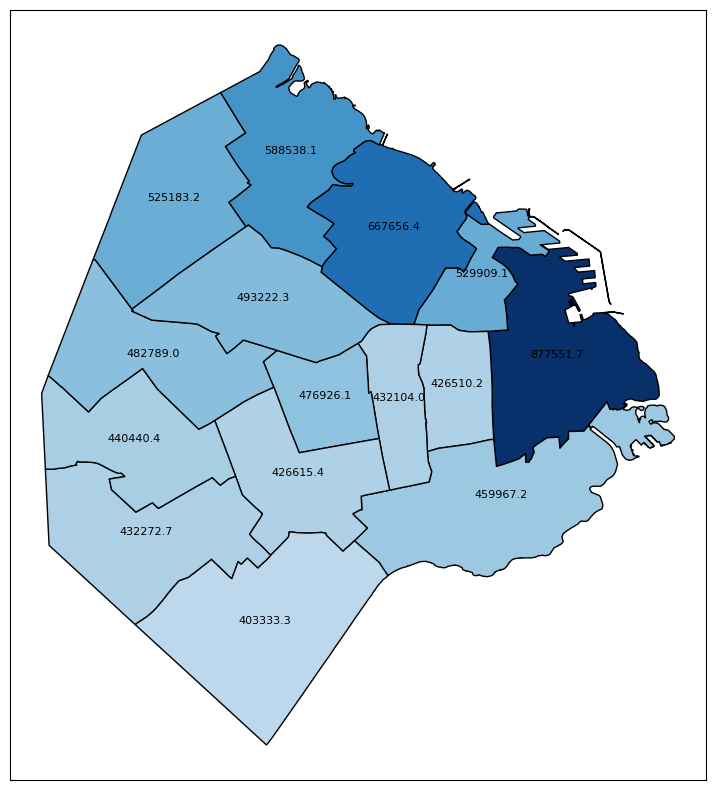

In [34]:
# Graficamos mapa precio promedio por comuna

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas_mapa_precio.plot(column="Precio promedio",
             ax=ax,
             cmap="Blues",
             edgecolor="black",
             vmin = 250000,
             vmax = 800000)

# Acá admitimos que le pedimos mucha ayuda a ChatGPT que nos armó un for para asignar las etiquetas a las comunas correspondientes

for idx, row in comunas_mapa_precio.iterrows():
    # Obtenemos el centroide de la geometría para colocar la etiqueta
    centroid = row.geometry.centroid
    # Agregamos la etiqueta en el centroide, usando el valor de la columna correspondiente
    ax.text(centroid.x, centroid.y,
            f'{row["Precio promedio"]}',
            fontsize=8,
            ha='center',
            color='black')

plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
# Mergeamos los datos geográficos de comunas con nuestro df de cantidad de publicaciones por comuna con key = comuna
comunas_mapa_publicaciones = comunas.merge(df_publicaciones_xcomuna, left_on= 'comuna', right_on= 'Comuna')

comunas_mapa_publicaciones

,id,objeto,comuna,barrios,perimetro,area,geometry,Comuna,Cantidad de publicaciones
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...",1,195
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...",2,214
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...",3,127
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...",4,58
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5,112
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,153
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630...",7,65
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6...",8,3
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6...",9,22
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10,78


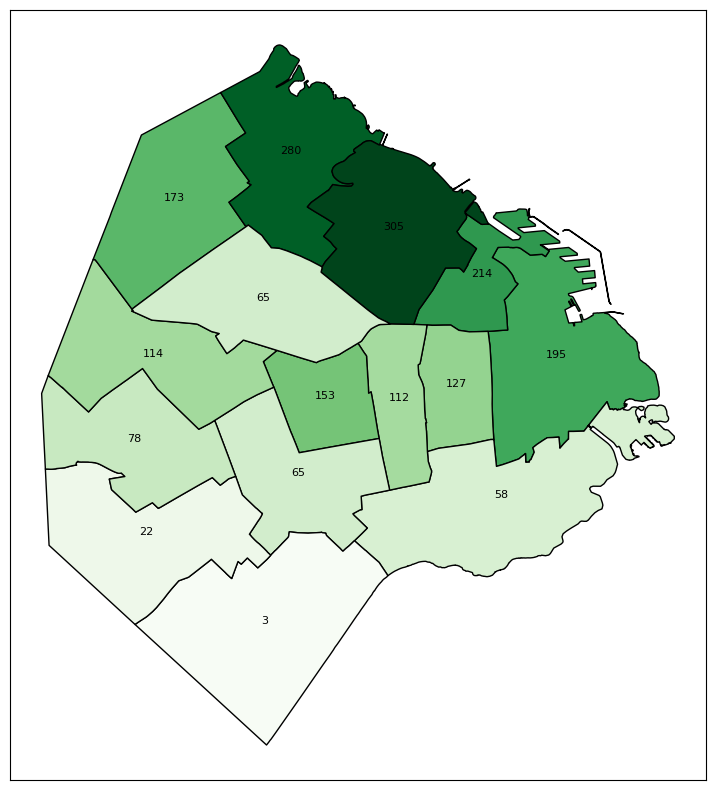

In [36]:
# Graficamos mapa cantidad de publicaciones por comuna
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas_mapa_publicaciones.plot(column="Cantidad de publicaciones",
             ax=ax,
             cmap="Greens",
             edgecolor="black")

for idx, row in comunas_mapa_publicaciones.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y,
            f'{row["Cantidad de publicaciones"]}',
            fontsize=8,
            ha='center',
            color='black')

plt.xticks([])
plt.yticks([])
plt.show()

In [37]:
# Hacemos groupby para contar cantidad de publicaciones en dólares por comuna
df_publicaciones_dolar = df_filtrado_dolares.groupby("Comuna", as_index=False)['Precio'].count()
# Renombramos columna
df_publicaciones_dolar.rename(columns={"Precio": "Cantidad de publicaciones en dolares"}, inplace=True)

df_publicaciones_dolar

,Comuna,Cantidad de publicaciones en dolares
0,1,74
1,2,41
2,3,7
3,4,3
4,5,3
5,6,6
6,10,1
7,11,7
8,12,13
9,13,46


In [38]:
# Mergeamos df de cantidad de publicaciones por comuna total con el de cantidad de publicaciones en dólares con key = comuna para poder hacer división despues
# usamos how = outer porque teníamos tres comunas sin publicaciones en dólares pero no queríamos perder el dato
df_prop_dolar = df_publicaciones_xcomuna.merge(df_publicaciones_dolar, left_on= 'Comuna', right_on= 'Comuna', how='outer')

df_prop_dolar

,Comuna,Cantidad de publicaciones,Cantidad de publicaciones en dolares
0,1,195,74
1,2,214,41
2,3,127,7
3,4,58,3
4,5,112,3
5,6,153,6
6,7,65,NaN
7,8,3,NaN
8,9,22,NaN
9,10,78,1


In [39]:
# Sacamos proporción de publicaciones en dólares sobre publicaciones totales para cada comuna * 100 (para tenerlo en %)
df_prop_dolar['Proporcion de publicaciones en dolares'] = df_prop_dolar['Cantidad de publicaciones en dolares'] / df_prop_dolar['Cantidad de publicaciones'] * 100

# Reemplazamos los NaN por ceros
df_prop_dolar.fillna(0, inplace=True)
# Redondeamos a 2 decimales
df_prop_dolar['Proporcion de publicaciones en dolares'] = df_prop_dolar['Proporcion de publicaciones en dolares'].round(2)

df_prop_dolar

,Comuna,Cantidad de publicaciones,Cantidad de publicaciones en dolares,Proporcion de publicaciones en dolares
0,1,195,74,38
1,2,214,41,19
2,3,127,7,6
3,4,58,3,5
4,5,112,3,3
5,6,153,6,4
6,7,65,0,0
7,8,3,0,0
8,9,22,0,0
9,10,78,1,1


In [40]:
# Mergeamos nuevamente los datos geográficos de comuna con el df de proporción en dólares con key = comuna
comunas_prop_dolares = comunas.merge(df_prop_dolar, left_on= 'comuna', right_on= 'Comuna')

comunas_prop_dolares

,id,objeto,comuna,barrios,perimetro,area,geometry,Comuna,Cantidad de publicaciones,Cantidad de publicaciones en dolares,Proporcion de publicaciones en dolares
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...",1,195,74,38
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...",2,214,41,19
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...",3,127,7,6
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...",4,58,3,5
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5,112,3,3
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,153,6,4
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630...",7,65,0,0
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6...",8,3,0,0
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6...",9,22,0,0
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10,78,1,1


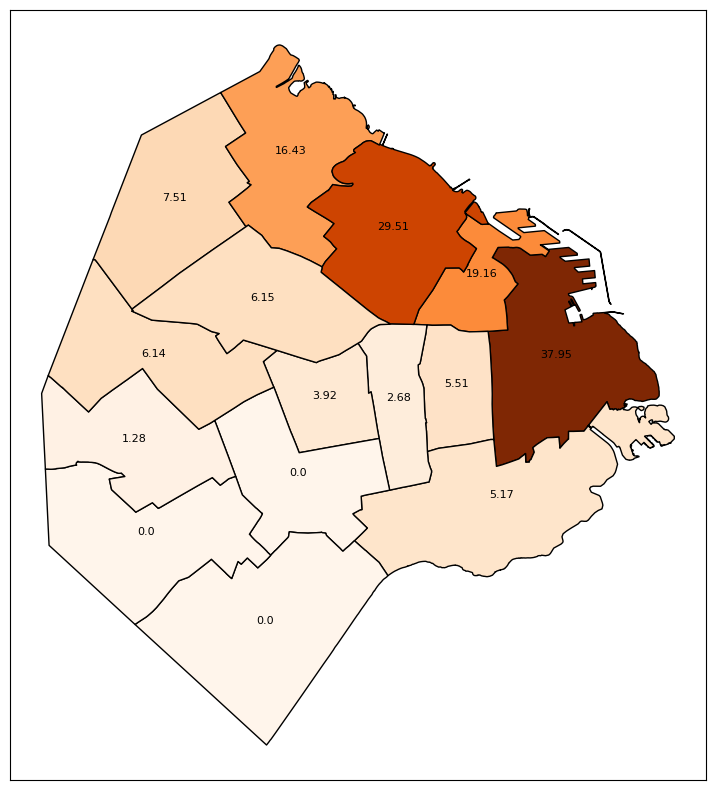

In [41]:
# Armamos el ùltimo gráfico de % de publicaciones en dólares por comuna
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas_prop_dolares.plot(column="Proporcion de publicaciones en dolares",
             ax=ax,
             cmap="Oranges",
             edgecolor="black")

for idx, row in comunas_prop_dolares.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y,
            f'{row["Proporcion de publicaciones en dolares"]}',
            fontsize=8,
            ha='center',
            color='black')

plt.xticks([])
plt.yticks([])
plt.show()